<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-cleaned-dataset" data-toc-modified-id="Import-libraries-and-cleaned-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and cleaned dataset</a></span><ul class="toc-item"><li><span><a href="#This-is-the-dataset-directly-from-cleaning" data-toc-modified-id="This-is-the-dataset-directly-from-cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>This is the dataset directly from cleaning</a></span></li></ul></li><li><span><a href="#Preparation-for-Modeling" data-toc-modified-id="Preparation-for-Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparation for Modeling</a></span><ul class="toc-item"><li><span><a href="#Classify-rating-score" data-toc-modified-id="Classify-rating-score-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Classify rating score</a></span></li><li><span><a href="#Create-dummy-variables-for--coffee-country-and-roast-level" data-toc-modified-id="Create-dummy-variables-for--coffee-country-and-roast-level-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create dummy variables for  coffee country and roast level</a></span></li><li><span><a href="#Create-data-frames-(X-and-y)-for-Great-Coffee" data-toc-modified-id="Create-data-frames-(X-and-y)-for-Great-Coffee-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create data frames (X and y) for Great Coffee</a></span></li><li><span><a href="#Logistical-Regression-for-Great-Coffee" data-toc-modified-id="Logistical-Regression-for-Great-Coffee-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Logistical Regression for Great Coffee</a></span></li><li><span><a href="#Random-Forest-for-Great-Coffee" data-toc-modified-id="Random-Forest-for-Great-Coffee-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random Forest for Great Coffee</a></span></li><li><span><a href="#Random-Forest-for-Awful-Coffee" data-toc-modified-id="Random-Forest-for-Awful-Coffee-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Random Forest for Awful Coffee</a></span></li></ul></li></ul></div>

# Import libraries and cleaned dataset

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import itertools
import statsmodels.api as sm
import operator

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import time

import re
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import Request, urlopen

## This is the dataset directly from cleaning
The one used in the sentiment analysis has 6 fewer entries where the "Bottom Line" had null value.  

In [2]:
df = pd.read_csv('cleaned_coffee_reviews.csv')

In [3]:
df.columns
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0'], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,Body,Aroma,Aftertaste,Acidity,Bottom Line,Prices Per Oz,Agtron Whole,Agtron Ground,Coffee Country
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,9,9,8,9.0,Enjoying this Costa Rica evokes the pleasures ...,1.92,58,76,Costa Rica
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,9,9,8,9.0,A bombshell of a coffee with enough personalit...,1.96,60,74,Colombia


In [4]:
# df['Roast Level'].value_counts().head()

In [5]:
# df.Rating.value_counts(normalize=True)

# Preparation for Modeling 

## Classify rating score
Coffee is great or not_great (and alternatively, awful and not_awful)

In [6]:
df['Great'] = [1 if x >= 95 else 0 for x in df['Rating']] 

In [7]:
print('great: ')
print(df.Great.value_counts())

great: 
0    1973
1     222
Name: Great, dtype: int64


## Create dummy variables for  coffee country and roast level

In [8]:
rl_dummies = pd.get_dummies(df['Roast Level'], prefix='RL')

In [9]:
rl_dummies.head(2)

,RL_Dark,RL_Light,RL_Medium,RL_Medium-Dark,RL_Medium-Light,RL_Very Dark
0,0,0,0,0,1,0
1,0,0,0,0,1,0


In [10]:
country_dummies = pd.get_dummies(df['Coffee Country'], prefix='CC')

In [11]:
 country_dummies.head(2)

,CC_Bolivia,CC_Brazil,CC_Burundi,CC_Colombia,CC_Congo,CC_Costa Rica,CC_Dominican Republic,CC_Ecuador,CC_El Salvador,CC_Ethiopia,...,CC_Tanzania,CC_Thailand,CC_USA,CC_Uganda,CC_United Kingdom,CC_World Blend,CC_Yemen,CC_Zambia,CC_Zimbabwe,CC_undisclosed
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = pd.concat([df, rl_dummies, country_dummies], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,...,CC_Tanzania,CC_Thailand,CC_USA,CC_Uganda,CC_United Kingdom,CC_World Blend,CC_Yemen,CC_Zambia,CC_Zimbabwe,CC_undisclosed
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,...,0,0,0,0,0,0,0,0,0,0
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,...,0,0,0,0,0,0,0,0,0,0


## Create data frames (X and y) for Great Coffee

In [13]:
# Split data into target and features

y = df['Great']
X = df.drop(columns=['Coffee Name','Roaster Name','Roaster Location','Coffee Origin','Rating','Roast Level','Review Date',
                     'Price','Agtron','Bottom Line','Agtron Whole','Great','Coffee Country'], axis=1)

In [14]:
X.columns

Index(['Flavor', 'Body', 'Aroma', 'Aftertaste', 'Acidity', 'Prices Per Oz',
       'Agtron Ground', 'RL_Dark', 'RL_Light', 'RL_Medium', 'RL_Medium-Dark',
       'RL_Medium-Light', 'RL_Very Dark', 'CC_Bolivia', 'CC_Brazil',
       'CC_Burundi', 'CC_Colombia', 'CC_Congo', 'CC_Costa Rica',
       'CC_Dominican Republic', 'CC_Ecuador', 'CC_El Salvador', 'CC_Ethiopia',
       'CC_Guatemala', 'CC_Haiti', 'CC_Honduras', 'CC_Indonesia', 'CC_Jamaica',
       'CC_Kenya', 'CC_Madagascar', 'CC_Malawi', 'CC_Malaysia', 'CC_Mexico',
       'CC_Myanmar', 'CC_Nepal', 'CC_Nicaragua', 'CC_Panama',
       'CC_Papua New Guinea', 'CC_Peru', 'CC_Philippines', 'CC_Puerto Rico',
       'CC_Rwanda', 'CC_Tanzania', 'CC_Thailand', 'CC_USA', 'CC_Uganda',
       'CC_United Kingdom', 'CC_World Blend', 'CC_Yemen', 'CC_Zambia',
       'CC_Zimbabwe', 'CC_undisclosed'],
      dtype='object')

In [15]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [16]:
# Standard scale data

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:
scaled_df = pd.DataFrame(X_train, columns=X.columns)

## Logistical Regression for Great Coffee

In [18]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

In [19]:
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [20]:
print("For Test Set:")
lg_report = classification_report(y_test,y_pred_test)
print(lg_report)

For Test Set:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78       490
           1       0.25      1.00      0.40        59

   micro avg       0.68      0.68      0.68       549
   macro avg       0.63      0.82      0.59       549
weighted avg       0.92      0.68      0.74       549



In [21]:
lr_prec = precision_score(y_test, y_pred_test)
lr_recall = recall_score(y_test, y_pred_test)
lr_acc = accuracy_score(y_test, y_pred_test)

In [22]:
print('Testing Accuracy of Log Reg: ', round(lr_acc,4)* 100, '%')

Testing Accuracy of Log Reg:  68.31 %


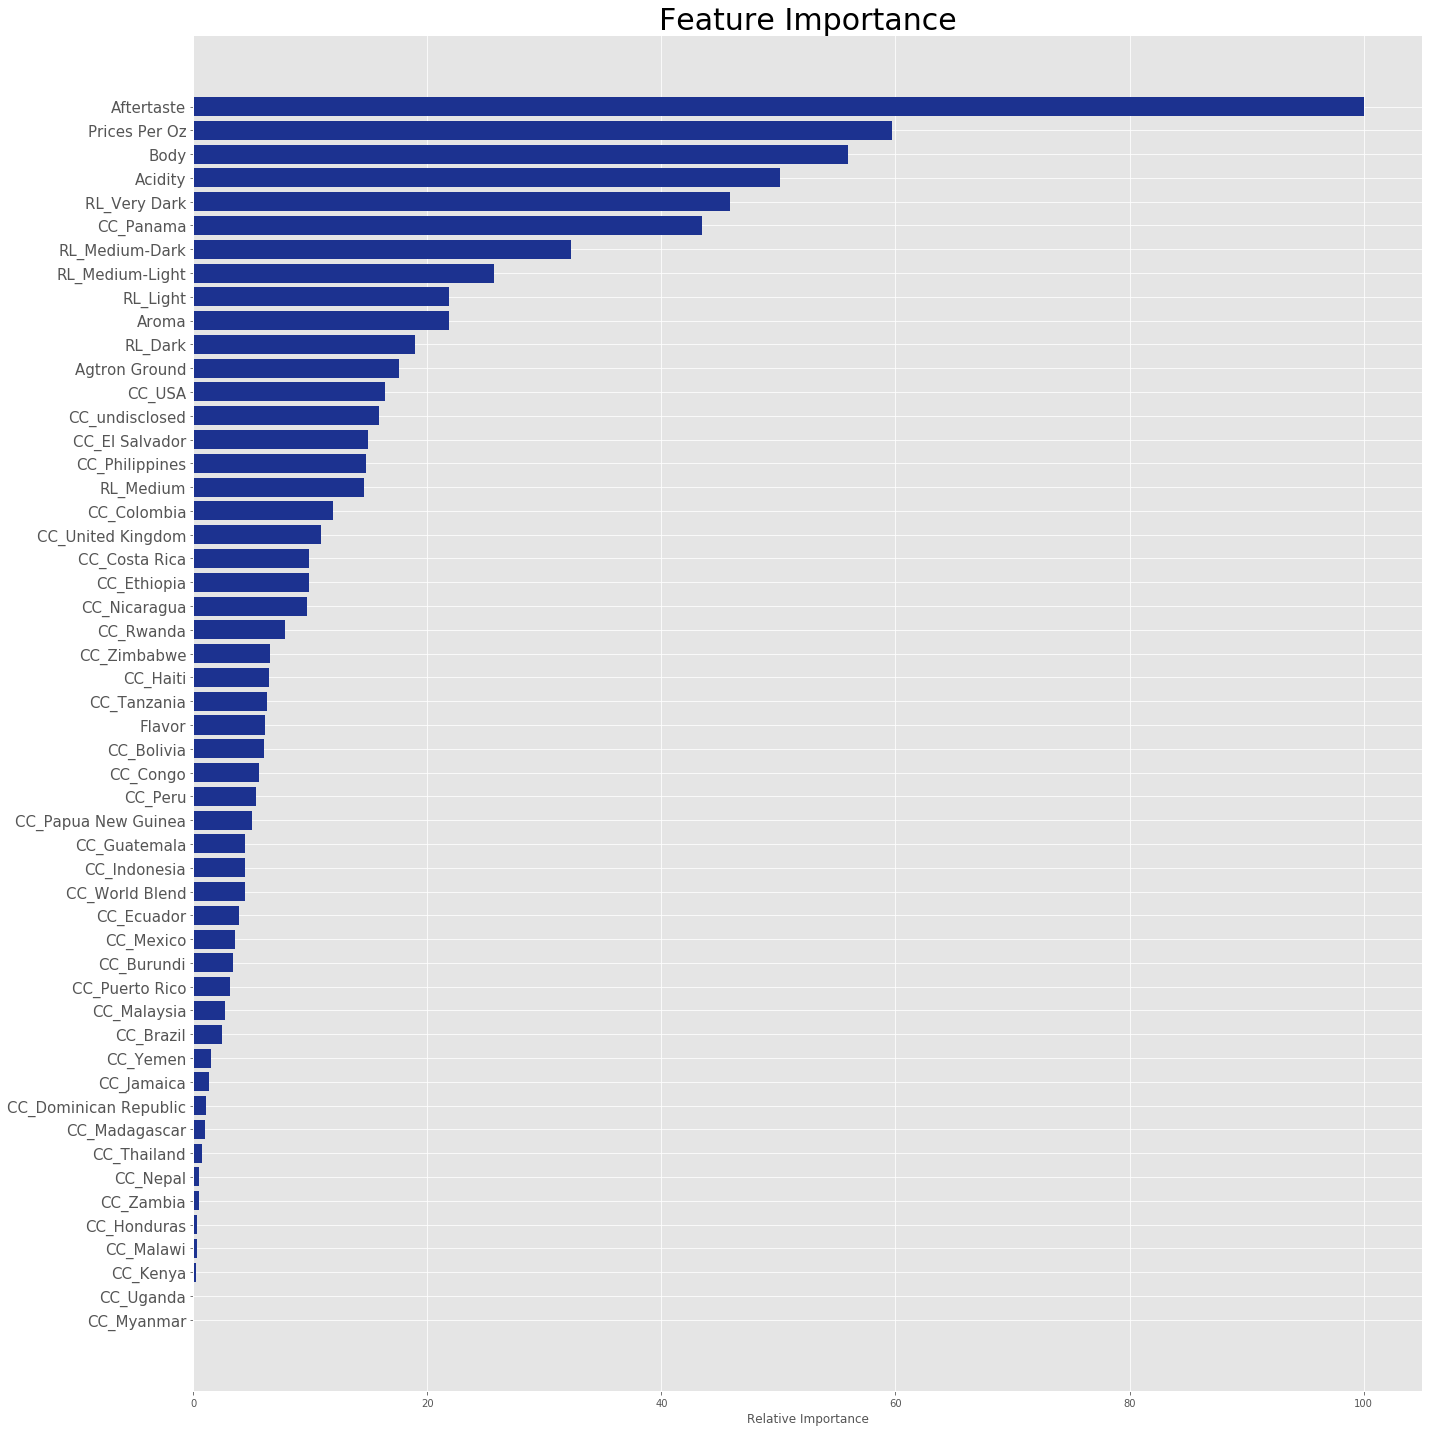

In [23]:
feature_importance = abs(model_log.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(20,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color='#1c3290')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=15)
featax.set_xlabel('Relative Importance')
featax.set_title("Feature Importance", fontsize=30)

plt.tight_layout()   
plt.show()

## Random Forest for Great Coffee

In [24]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

print("For Test Set:")
rf_report = classification_report(y_test, y_pred_test)
print(rf_report)   

rf_acc = forest.score(X_test,y_test)
print('Testing Accuracy of RF: ', round(rf_acc,4)* 100, '%')

# plot_confusion(y_test,y_pred_test)

For Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       490
           1       0.91      0.88      0.90        59

   micro avg       0.98      0.98      0.98       549
   macro avg       0.95      0.94      0.94       549
weighted avg       0.98      0.98      0.98       549

Testing Accuracy of RF:  97.81 %


In [25]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center',color='#1c3290') 
#     plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel('Feature importance', fontsize=20)
    plt.ylabel('Feature',fontsize=20)
    

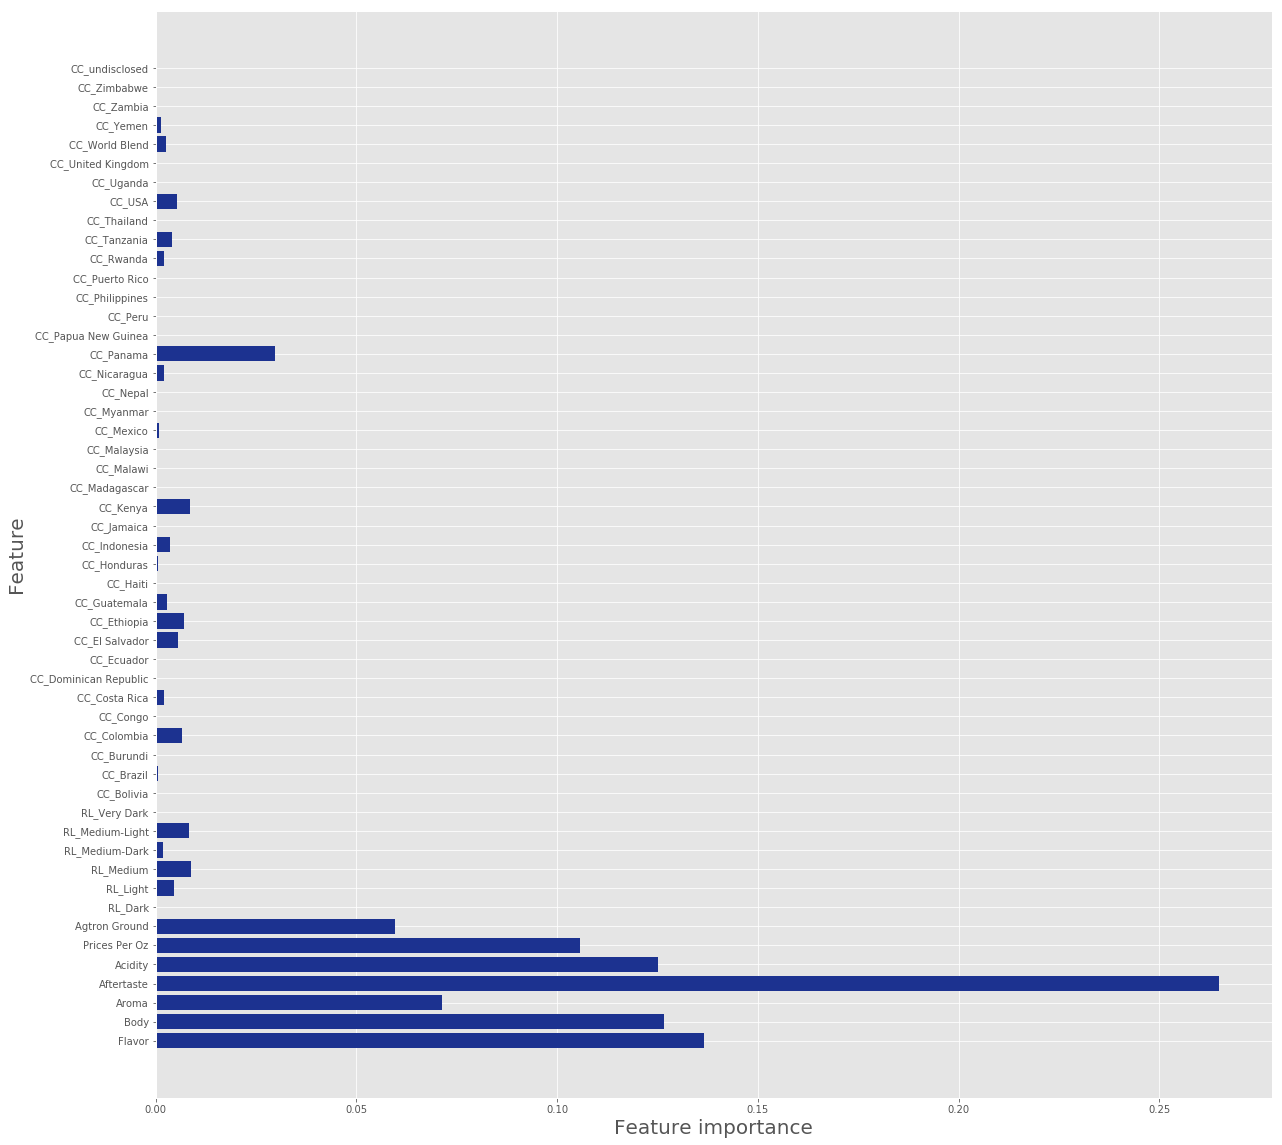

In [26]:
plot_feature_importances(forest)

## Random Forest for Awful Coffee

In [27]:
df = pd.read_csv('cleaned_coffee_reviews.csv')
df.columns
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0'], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,Body,Aroma,Aftertaste,Acidity,Bottom Line,Prices Per Oz,Agtron Whole,Agtron Ground,Coffee Country
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,9,9,8,9.0,Enjoying this Costa Rica evokes the pleasures ...,1.92,58,76,Costa Rica
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,9,9,8,9.0,A bombshell of a coffee with enough personalit...,1.96,60,74,Colombia


In [28]:
df['Awful'] = [1 if x <= 89 else 0 for x in df['Rating']] 
print('awful: ')
print(df.Awful.value_counts())

awful: 
0    2019
1     176
Name: Awful, dtype: int64


In [29]:
rl_dummies = pd.get_dummies(df['Roast Level'], prefix='RL')
country_dummies = pd.get_dummies(df['Coffee Country'], prefix='CC')
df = pd.concat([df, rl_dummies, country_dummies], axis=1)

In [30]:
y = df['Awful']
X = df.drop(columns=['Coffee Name','Roaster Name','Roaster Location','Coffee Origin','Rating','Roast Level','Review Date',
                     'Price','Agtron','Bottom Line','Agtron Whole','Awful','Coffee Country'], axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [32]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
scaled_df = pd.DataFrame(X_train, columns=X.columns)

In [33]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

print("For Test Set:")
rf_report = classification_report(y_test, y_pred_test)
print(rf_report)   

rf_acc = forest.score(X_test,y_test)
print('Testing Accuracy of RF: ', round(rf_acc,4)* 100, '%')

# plot_confusion(y_test,y_pred_test)

For Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       507
           1       0.93      0.88      0.90        42

   micro avg       0.99      0.99      0.99       549
   macro avg       0.96      0.94      0.95       549
weighted avg       0.99      0.99      0.99       549

Testing Accuracy of RF:  98.54 %


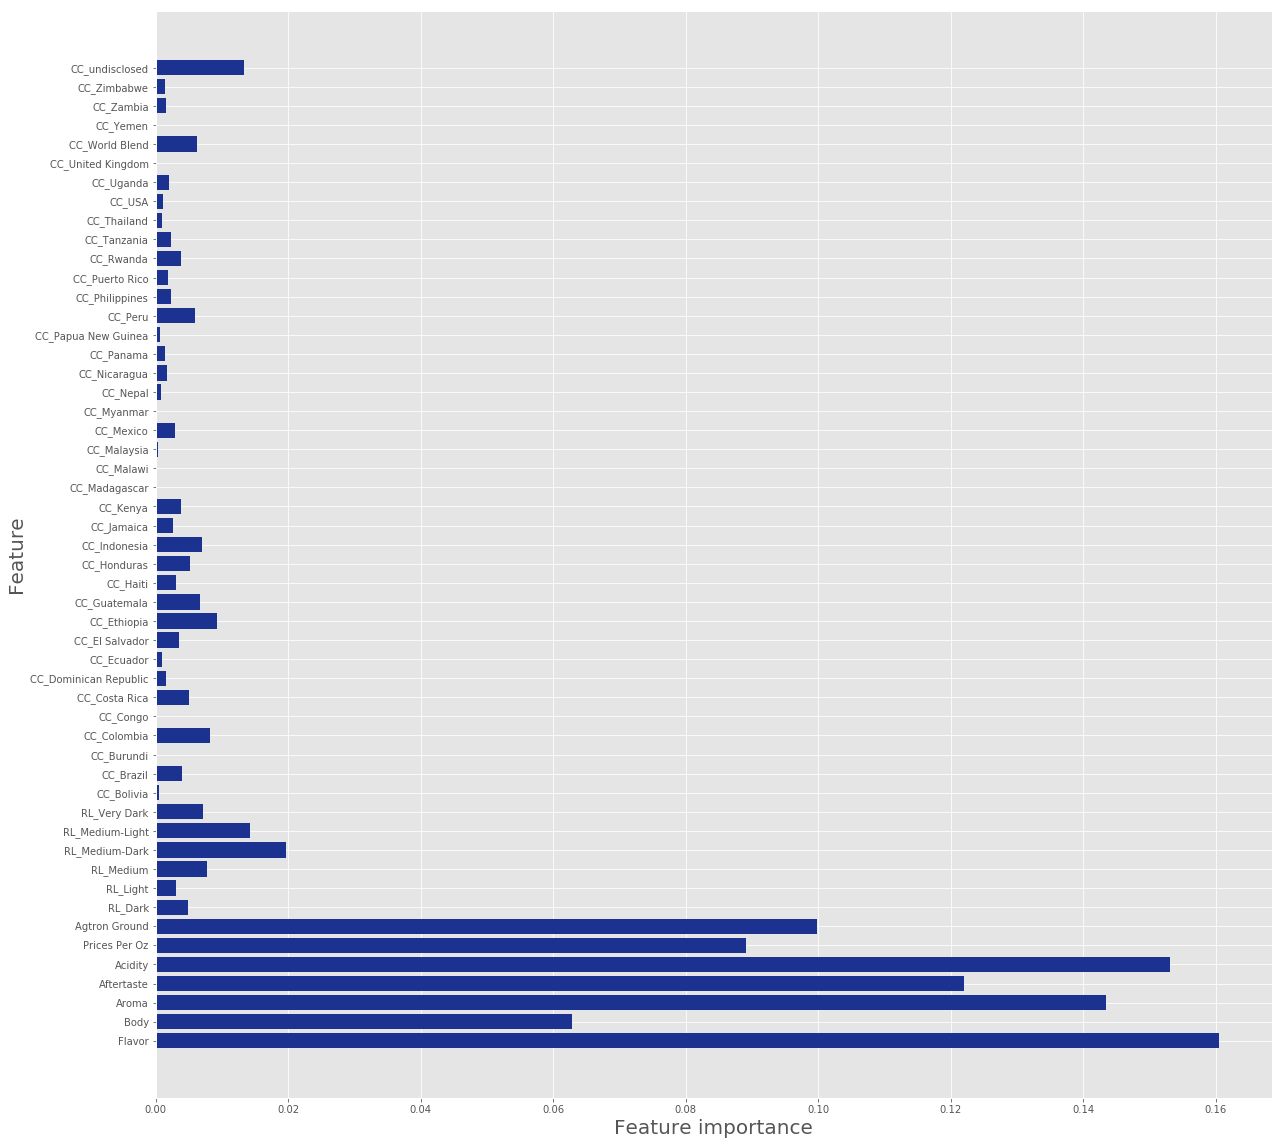

In [34]:
plot_feature_importances(forest)